In [8]:
# dependencies
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [14]:
# read csv
file = ("winequality-red.csv")

wine = pd.read_csv(file)

wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# read columns
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
# split X into features and labels
X = wine.drop(['alcohol'], axis = 1)

X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5


In [21]:
# split y into features and labels
y = wine[['alcohol']]

y.head()

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4


In [24]:
# split into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, shuffle = True, random_state = 3)

C:\Users\Holly\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
# read trained
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
606,9.4,0.41,0.48,4.6,0.072,10.0,20.0,0.99730,3.34,0.79,7
362,11.9,0.58,0.66,2.5,0.072,6.0,37.0,0.99920,3.05,0.56,5
533,10.3,0.27,0.24,2.1,0.072,15.0,33.0,0.99560,3.22,0.66,6
1397,7.3,0.59,0.26,2.0,0.080,17.0,104.0,0.99584,3.28,0.52,5
733,7.0,0.45,0.34,2.7,0.082,16.0,72.0,0.99800,3.55,0.60,5


In [64]:
# describe trained

X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality
count,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000,1279.000000
mean,8.357154,0.526771,0.272416,2.521384,0.086697,15.722439,46.295543,0.996766,3.310367,0.657834,5.646599
std,1.752126,0.180265,0.195608,1.353377,0.044871,10.382304,33.401788,0.001864,0.156628,0.171037,0.815664
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.370000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,21.000000,0.995600,3.210000,0.550000,5.000000
50%,8.000000,0.520000,0.260000,2.200000,0.079000,13.000000,38.000000,0.996800,3.310000,0.620000,6.000000
75%,9.300000,0.635000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997850,3.400000,0.730000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,8.000000


In [30]:
# definition of categorical and numerical attributes

categorical_attributes = ['quality']

numerical_attributes = list(X_train.drop(categorical_attributes, axis=1))

In [41]:
# create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [61]:
# fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6911374778913024
Testing Score: 0.6857931826968064


In [65]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

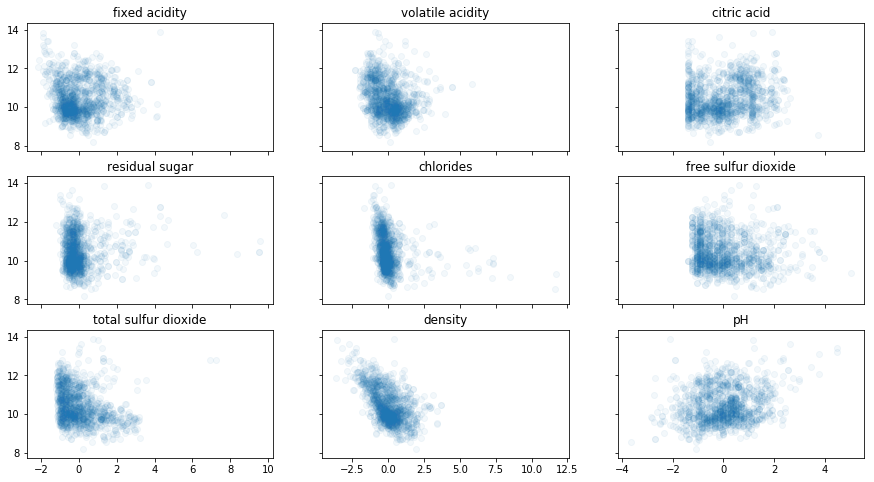

In [63]:
# plot each feature except quality against y_predict to see if there is any obvious linearity.

f, axarr = plt.subplots(3, 3, sharex='col', sharey='row', figsize = [15,8])

axarr[0, 0].scatter(X_train_prepared[:,0], y_predict, alpha = 0.05)
axarr[0, 0].set_title('fixed acidity')

axarr[0, 1].scatter(X_train_prepared[:,1], y_predict, alpha = 0.05)
axarr[0, 1].set_title('volatile acidity')

axarr[0, 2].scatter(X_train_prepared[:,2], y_predict, alpha = 0.05)
axarr[0, 2].set_title('citric acid')

axarr[1, 0].scatter(X_train_prepared[:,3], y_predict, alpha = 0.05)
axarr[1, 0].set_title('residual sugar')

axarr[1, 1].scatter(X_train_prepared[:,4], y_predict, alpha = 0.05)
axarr[1, 1].set_title('chlorides')

axarr[1, 2].scatter(X_train_prepared[:,5], y_predict, alpha = 0.05)
axarr[1, 2].set_title('free sulfur dioxide')

axarr[2, 0].scatter(X_train_prepared[:,6], y_predict, alpha = 0.05)
axarr[2, 0].set_title('total sulfur dioxide')

axarr[2, 1].scatter(X_train_prepared[:,7], y_predict, alpha = 0.05)
axarr[2, 1].set_title('density')

axarr[2, 2].scatter(X_train_prepared[:,8], y_predict, alpha = 0.05)
axarr[2, 2].set_title('pH')

plt.show()

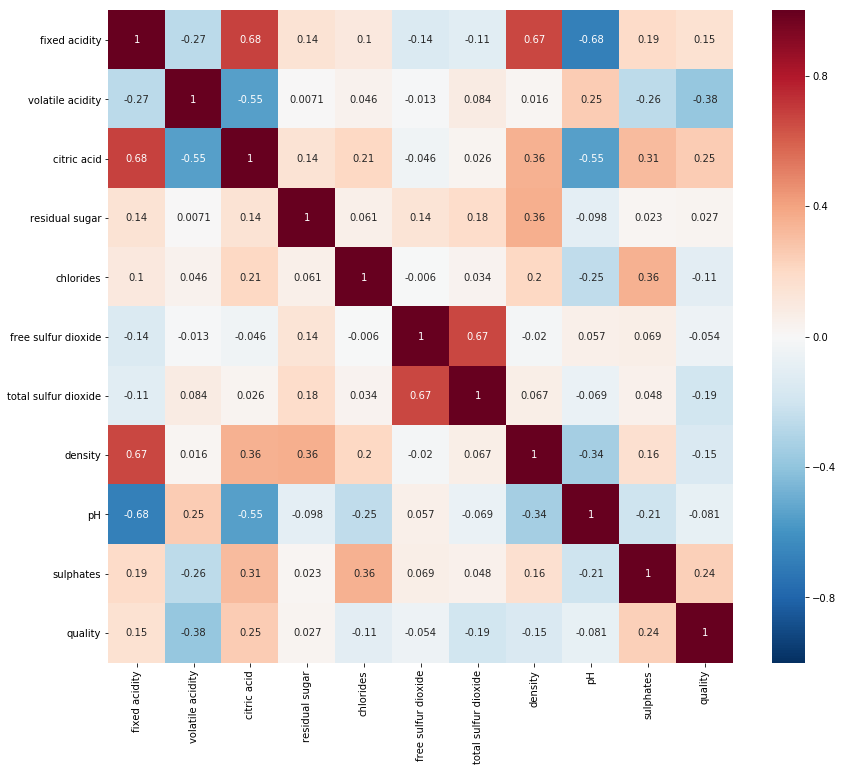

In [72]:
import seaborn as sns
correlation = X_train.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")